In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB

import matplotlib.pyplot as plt
import numpy as np
from fn_PSHA_given_M_lambda import fn_PSHA_given_M_lambda
from gmpe_eval import gmpe_eval
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
x = np.logspace(-3, np.log10(2), num=100)   # IM values to consider
T = 1 # period of interest
IM_label = 'SA(1s)'
Axis_label = 'Spectral Acceleration, SA(1s) [g]'
gmpeFlag = 1 # use BJF97

# Seismicity and CY parameters
rup = {"Fault_Type":1, "Vs30":500, "R":10, "Ztor":0, "delta":90, "rupLambda":0, "Z10":999, "Fhw":0, "FVS30":0, "region":1}

# # Plotting parameters
figureAxisLimits = [0.05, max(x), 1e-5, 1e-1]
figureXTickVals = [0.05, 0.1, 0.5, 1, 2]


In [3]:
# Point source with G-R magnitudes

# From Table 3.5, \label{tab:grExample_mMax}, fixed rate of M>5, M_max = 8
lambda_M = [0.05, 0.03153, 0.01988, 0.01252, 0.007882, 0.004955, 0.003108, 0.001942, 0.001207, 0.0007432, 0.0004505, 0.0002657, 0.0001492, 7.57E-05, 2.93E-05]
M_vals = np.arange(5.1, 8.1, 0.2)

x_example1 = 0.2 # example values for table
lambda1, example_output1, disagg1 = fn_PSHA_given_M_lambda(lambda_M, M_vals, T, x, x_example1, rup, gmpeFlag)

x_example2 = 0.5 # output results for a second threshold
lambda2, example_output2, disagg2 = fn_PSHA_given_M_lambda(lambda_M, M_vals, T, x, x_example2, rup, gmpeFlag)


Text(0.55, 0.0002643558076823935, '$\\lambda$(SA(1s) > 0.5 g) = \n0.00022')

<Figure size 432x288 with 0 Axes>

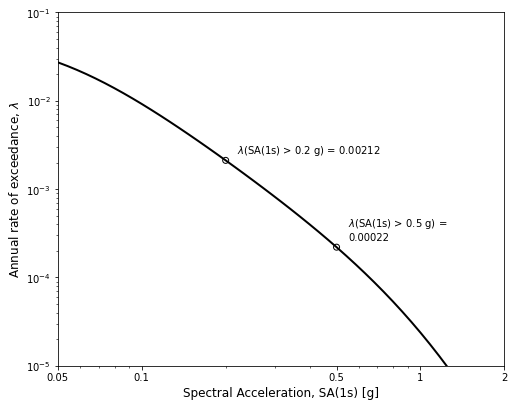

In [4]:
# Plot Fig 6.6 : hazard curve
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda1["x"], '-k', linewidth=2)
ax.scatter(x_example1, lambda1["example"], facecolors='none', edgecolor='k')
ax.scatter(x_example2, lambda2["example"], facecolors='none', edgecolor='k')
ax.set_xlabel(Axis_label, fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(10**(-5), 10**(-1))
ax.set_xlim(0.05, 2)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)
text1 = '$\lambda$(' + IM_label + ' > ' + str(x_example1) + ' g) = ' + str(format(lambda1["example"],".5f"))
text2 = '$\lambda$(' + IM_label + ' > ' + str(x_example2) + ' g) = \n' + str(format(lambda2["example"],".5f"))
ax.text(x_example1*1.1, lambda1["example"]*1.2, text1, fontsize=10)
ax.text(x_example2*1.1, lambda2["example"]*1.2, text2, fontsize=10)


In [5]:
# Output a subset of the hazard curve for use in a table
imSmall = [1e-3] + list(np.arange(1,11)/10) 
interpF = interp1d(np.log(x),np.log(lambda1["x"]))
ratesSmall = np.exp(interpF(np.log(imSmall))) # loglog interpolate
hazTable = np.transpose([imSmall, ratesSmall])


mBar = 6.467117966920286  7.167136882517294


<Figure size 432x288 with 0 Axes>

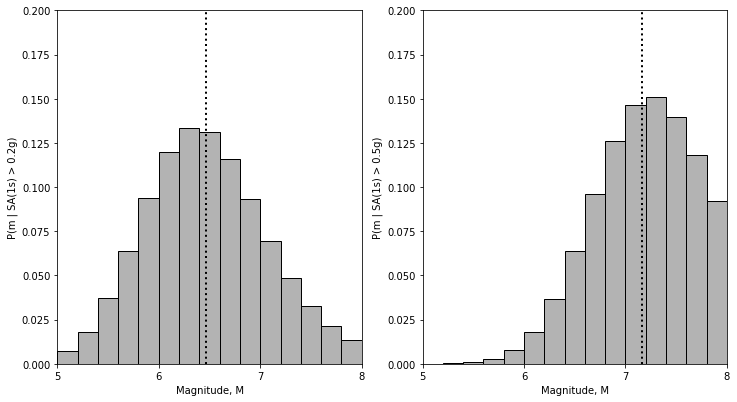

In [6]:
# Plot Fig 7.2: disaggregation

plt.figure(2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6.5))
ax1.bar(M_vals, disagg1["example"], width=0.2, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax1.plot([disagg1["Mbar"],disagg1["Mbar"]], [0, 1], ':k', linewidth=2)
ax1.set_xlabel('Magnitude, M')
ax1.set_ylabel('P(m | '+IM_label+' > '+str(x_example1)+'g)')
ax1.set_xlim(5, 8)
ax1.set_ylim(0, 0.2)
ax1.set_xticks(np.arange(5, 9, step = 1))

ax2.bar(M_vals, disagg2["example"], width=0.2, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax2.plot([disagg2["Mbar"],disagg2["Mbar"]], [0, 1], ':k', linewidth=2)
ax2.set_xlabel('Magnitude, M')
ax2.set_ylabel('P(m | '+IM_label+' > '+str(x_example2)+'g)')
ax2.set_xlim(5, 8)
ax2.set_ylim(0, 0.2)
ax2.set_xticks(np.arange(5, 9, step = 1))

print("mBar = " + str(disagg1["Mbar"]) + "  " + str(disagg2["Mbar"]))
disagg_table = np.transpose([M_vals, disagg1["example"], disagg2["example"]])

mBarEqual = 6.111204261991068  6.943813233869701


<Figure size 432x288 with 0 Axes>

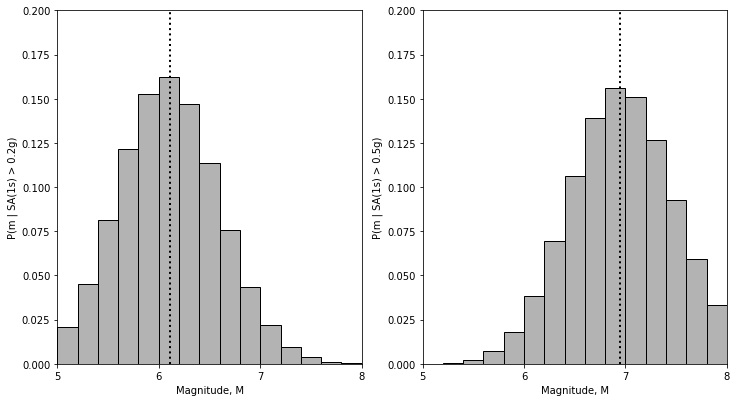

In [7]:
# Plot fig 7.5: disagg conditional on equalling
plt.figure(3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6.5))
ax1.bar(M_vals, disagg1["equal"], width=0.2, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax1.plot([disagg1["equalMbar"],disagg1["equalMbar"]], [0, 1], ':k', linewidth=2)
ax1.set_xlabel('Magnitude, M')
ax1.set_ylabel('P(m | '+IM_label+' > '+str(x_example1)+'g)')
ax1.set_xlim(5, 8)
ax1.set_ylim(0, 0.2)
ax1.set_xticks(np.arange(5, 9, step = 1))


ax2.bar(M_vals, disagg2["equal"], width=0.2, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax2.plot([disagg2["equalMbar"],disagg2["equalMbar"]], [0, 1], ':k', linewidth=2)
ax2.set_xlabel('Magnitude, M')
ax2.set_ylabel('P(m | '+IM_label+' > '+str(x_example2)+'g)')
ax2.set_xlim(5, 8)
ax2.set_ylim(0, 0.2)
ax2.set_xticks(np.arange(5, 9, step = 1))

print("mBarEqual = " + str(disagg1["equalMbar"]) + "  " + str(disagg2["equalMbar"]))


mBarCoarse = 6.467869855442114  7.171108098327401


<Figure size 432x288 with 0 Axes>

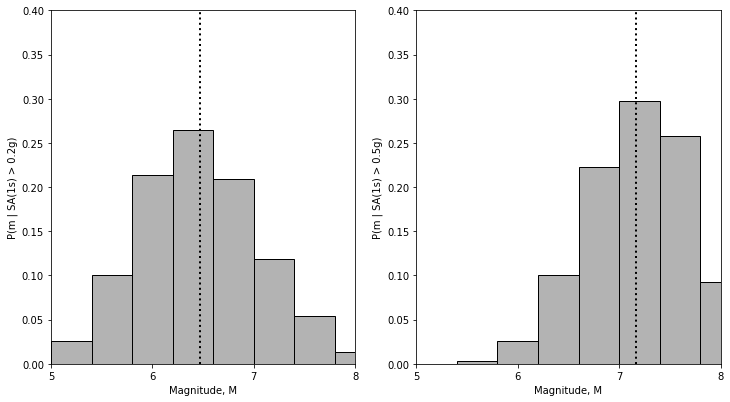

In [8]:
# Plot fig 7.4: coarsen the disaggregation bins

# Extend the arrays to get an even number of values for disaggregation
M_valsEx = np.array(list(M_vals) + [8.1])
disagg1["exampleEx"] = np.array(list(disagg1["example"]) + [0])
disagg2["exampleEx"] = np.array(list(disagg2["example"]) + [0])

M_valsCoarse = []
M_disaggCoarse1 = []
M_disaggCoarse2 = []
for i in range(int(len(M_valsEx)/2)):
    idx = 2 * i
    M_valsCoarse.append(np.mean(M_valsEx[idx:idx+2]))
    M_disaggCoarse1.append(np.sum(disagg1["exampleEx"][idx:idx+2]))
    M_disaggCoarse2.append(np.sum(disagg2["exampleEx"][idx:idx+2]))

MeanM1 = np.sum(np.array(M_valsCoarse)*np.array(M_disaggCoarse1)) 
MeanM2 = np.sum(np.array(M_valsCoarse)*np.array(M_disaggCoarse2)) 

plt.figure(4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6.5))
ax1.bar(M_valsCoarse, M_disaggCoarse1, width=0.4, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax1.plot([MeanM1, MeanM1], [0, 1], ':k', linewidth=2)
ax1.set_xlabel('Magnitude, M')
ax1.set_ylabel('P(m | '+IM_label+' > '+str(x_example1)+'g)')
ax1.set_xlim(5, 8)
ax1.set_ylim(0, 0.4)
ax1.set_xticks(np.arange(5, 9, step = 1))


ax2.bar(M_valsCoarse, M_disaggCoarse2, width=0.4, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax2.plot([MeanM2, MeanM2], [0, 1], ':k', linewidth=2)
ax2.set_xlabel('Magnitude, M')
ax2.set_ylabel('P(m | '+IM_label+' > '+str(x_example2)+'g)')
ax2.set_xlim(5, 8)
ax2.set_ylim(0, 0.4)
ax2.set_xticks(np.arange(5, 9, step = 1))

print("mBarCoarse = " + str(MeanM1) + "  " + str(MeanM2))


epsBar = 1.168041736442711  1.4220541916017888


<Figure size 432x288 with 0 Axes>

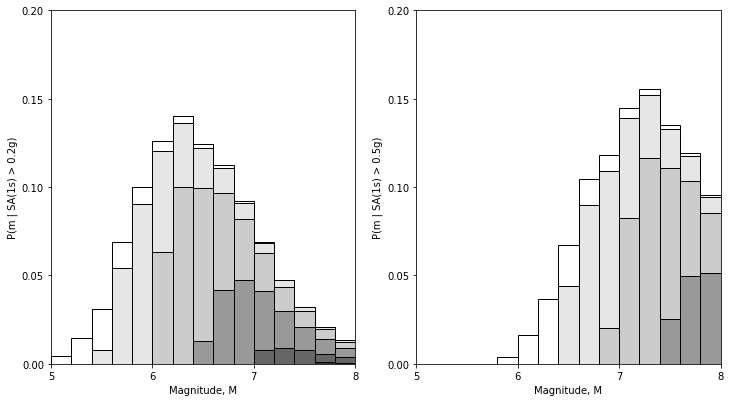

In [9]:
# Plot Fig 7.6: disaggregation with epilson 
plt.figure(5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6.5))
c = ['0', '0.2', '0.4', '0.6', '0.8', '0.9', '1']
for i in range(disagg1["M_Eps"].shape[1]):
    bottom=np.sum(disagg1["M_Eps"][:,0:i], axis=1)
    ax1.bar(M_vals, disagg1["M_Eps"][:,i], bottom=bottom, width=0.2, edgecolor = 'k', color=c[i])
ax1.set_xlabel('Magnitude, M')
ax1.set_ylabel('P(m | '+IM_label+' > '+str(x_example1)+'g)')
ax1.set_xlim(5, 8)
ax1.set_ylim(0, 0.2)
ax1.set_yticks(np.arange(0, 0.25, step = 0.05))
ax1.set_xticks(np.arange(5, 9, step = 1))

for i in range(disagg2["M_Eps"].shape[1]):
    bottom=np.sum(disagg2["M_Eps"][:,0:i], axis=1)
    ax2.bar(M_vals, disagg2["M_Eps"][:,i], bottom=bottom, width=0.2, edgecolor = 'k', color=c[i])
ax2.set_xlabel('Magnitude, M')
ax2.set_ylabel('P(m | '+IM_label+' > '+str(x_example2)+'g)')
ax2.set_xlim(5, 8)
ax2.set_ylim(0, 0.2)
ax2.set_yticks(np.arange(0, 0.25, step = 0.05))
ax2.set_xticks(np.arange(5, 9, step = 1))

print("epsBar = " + str(disagg1["epsBar"]) + "  " + str(disagg2["epsBar"]))


In [10]:
# Metrics to evaluate calculations and figure

# im with given rate
rateTarg = 1/1000

# log interpolation
interpF = interp1d(np.log(ratesSmall), np.log(imSmall))
imTarg = np.exp(interpF(np.log(rateTarg)))

# manual log interpolation
lnImManual  = ((np.log(0.2) - np.log(0.3)) * (np.log(1e-3) - np.log(6.81e-4))) / (np.log(2.7e-3) - np.log(6.81e-4)) + np.log(0.3) 
imManual = np.exp(lnImManual)

# hazard curves slope
imSlope = [0.2, 0.3]

# loglog interpolate
interpF2 = interp1d(np.log(x),np.log(lambda1["x"]))
rateSlope = np.exp(interpF2(np.log(imSlope))) 
kEst = - (np.log(rateSlope[0]) - np.log(rateSlope[1]))/ (np.log(imSlope[0])- np.log(imSlope[1]))
k0Est = rateSlope[0] / np.exp(-kEst * np.log(imSlope[0]))
lambdaPowerLaw = k0Est * np.exp(-kEst*np.log(x))


<Figure size 432x288 with 0 Axes>

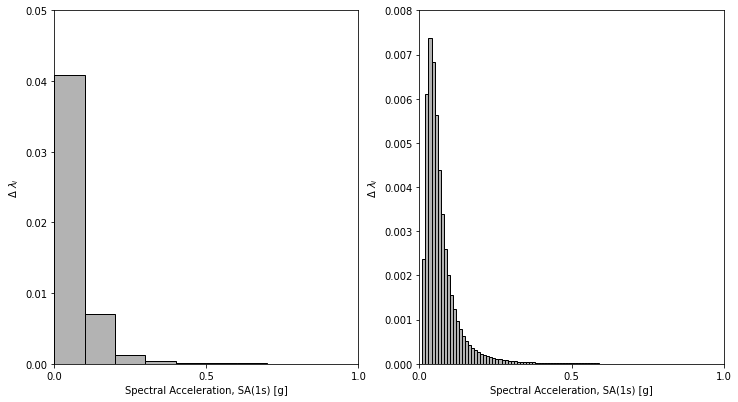

In [11]:
# Hazard curve derivative
dLambda = -np.diff(list(ratesSmall) + [0])

# Finer discretization
xFine = np.arange(0.01, 1.01, step = 0.01)
lambdaFine = np.exp(interpF2(np.log(xFine))) # loglog interpolate
dLambdaFine = -np.diff(list(lambdaFine) + [0])

# Plot Fig 6.8
plt.figure(6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6.5))
ax1.bar(np.array(imSmall)+0.05, dLambda, width=0.1, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax1.set_xlabel(Axis_label)
ax1.set_ylabel('$\Delta$ $\lambda_i$')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 0.05)
ax1.set_xticks([0, 0.5, 1])

ax2.bar(xFine+0.005, dLambdaFine, width=0.01, color=[0.7, 0.7, 0.7], edgecolor = 'k')
ax2.set_xlabel(Axis_label)
ax2.set_ylabel('$\Delta$ $\lambda_i$')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.008)
ax2.set_xticks([0, 0.5, 1])


<Figure size 432x288 with 0 Axes>

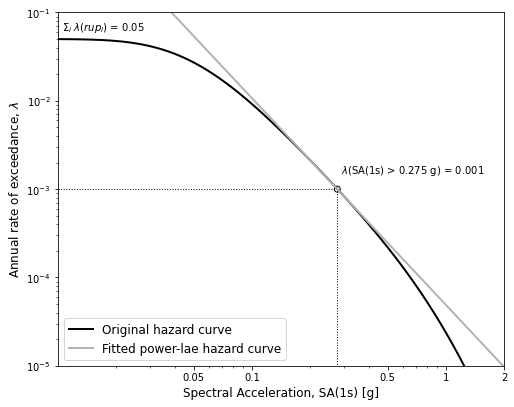

In [12]:
# Plot Fig 6.7: summary plot
plt.figure(7)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda1["x"], '-k', linewidth=2, label='Original hazard curve')
ax.scatter(imTarg, rateTarg, facecolors='none', edgecolor='k')
ax.plot([0.01, imTarg, imTarg], [rateTarg, rateTarg, 1e-10], ':k', linewidth=1)
ax.plot(x, lambdaPowerLaw, linewidth=2, color=[0.7, 0.7, 0.7], label='Fitted power-lae hazard curve')
ax.set_ylim(1e-5, 1e-1)
ax.set_xlim(0.01, 2)
ax.set_xlabel(Axis_label, fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)
text1 = '$\lambda$(' + IM_label + ' > ' + str(format(imTarg,".3f")) + ' g) = ' + str(format(rateTarg,".3f"))
text2 = '$\Sigma_i$ $\lambda(rup_i)$ = ' + str(lambda_M[0])
ax.text(imTarg*1.05, rateTarg*1.5, text1, fontsize=10)
ax.text(0.01*1.05, lambda_M[0]*1.25, text2, fontsize=10)
ax.legend(loc='lower left', fontsize=12)


(1e-05, 0.1)

<Figure size 432x288 with 0 Axes>

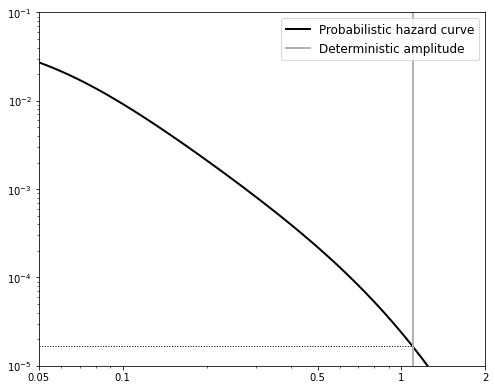

In [13]:
# Hazard curve plus deterministic amplitude
M_deterministic = max(M_vals)
sa, sigma = gmpe_eval(T, M_deterministic, rup, gmpeFlag)
sa84 = np.exp(np.log(sa)+sigma)
interpF3 = interp1d(x, np.log(lambda1["x"]))
deterministicRate = np.exp(interpF3(sa84))

# Plot Fig 6.18 
plt.figure(8)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda1["x"], '-k', linewidth=2, label='Probabilistic hazard curve')
ax.plot([sa84, sa84], figureAxisLimits[2:4], linewidth=2,  color=[0.7, 0.7, 0.7], label='Deterministic amplitude')
ax.plot([figureAxisLimits[0], sa84], [deterministicRate, deterministicRate], ':k', linewidth=1)
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)
ax.set_xlim(0.05, 2)
ax.set_ylim(1e-5, 1e-1)